In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
import math

In [2]:
data = pd.read_csv("Absenteeism_at_work.csv", sep=",", )
pd.read_csv()

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average per day        740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [6]:
data.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [7]:
X = data.iloc[:, 1:-1]  
y = data.iloc[:,-1]
X.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [8]:
y.head()

0    4
1    0
2    2
3    4
4    2
Name: Absenteeism time in hours, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 1)

In [10]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=250)


In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:
type(y_test)

pandas.core.series.Series

In [13]:
type(y_pred)

numpy.ndarray

In [14]:
from sklearn import metrics
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 136.72817837128895


In [15]:
print("The R^2: ",clf.score(X,y)*100,"%")
print("The Training R^2 is: ",clf.score(X_train,y_train)*100,"%") 
print("The Testing R^2 is: ",clf.score(X_test,y_test)*100,"%")

The R^2:  65.5885990904641 %
The Training R^2 is:  83.92572971467102 %
The Testing R^2 is:  22.175794711559472 %


In [16]:
feature_imp = pd.Series(clf.feature_importances_, index = np.array(X.columns)).sort_values(ascending=False)
feature_imp

Reason for absence                 0.235747
Work load Average per day          0.162684
Age                                0.092632
Month of absence                   0.085493
Day of the week                    0.060163
Hit target                         0.056385
Transportation expense             0.051336
Seasons                            0.040773
Height                             0.038692
Weight                             0.037753
Son                                0.035070
Distance from Residence to Work    0.032552
Body mass index                    0.017850
Service time                       0.017419
Pet                                0.017344
Social drinker                     0.009510
Social smoker                      0.004924
Disciplinary failure               0.001949
Education                          0.001722
dtype: float64

In [17]:
type(feature_imp)

pandas.core.series.Series

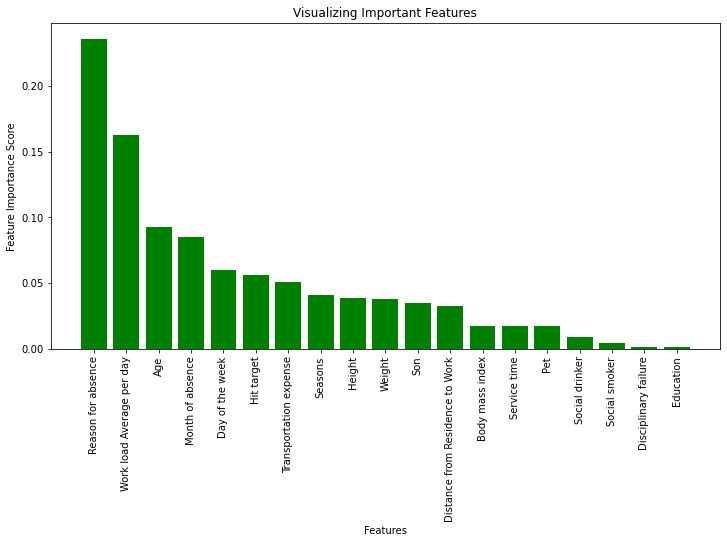

In [18]:
plt.figure(figsize=(12,6))
plt.bar(feature_imp.index, feature_imp, color="g") 
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(rotation = "vertical")
plt.show()

In [19]:
feature_imp[feature_imp >0.05].sum()

0.7444412878059304

In [20]:
feature_imp_select = feature_imp[feature_imp >0.05] 
feature_imp_select

Reason for absence           0.235747
Work load Average per day    0.162684
Age                          0.092632
Month of absence             0.085493
Day of the week              0.060163
Hit target                   0.056385
Transportation expense       0.051336
dtype: float64

In [21]:
feature_imp_select.index

Index(['Reason for absence', 'Work load Average per day', 'Age',
       'Month of absence', 'Day of the week', 'Hit target',
       'Transportation expense'],
      dtype='object')

In [22]:
X1 = data[feature_imp_select.index]  
y1 = data['Absenteeism time in hours']

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 1)

In [24]:
clf1=RandomForestRegressor(n_estimators=1000)
clf1.fit(X1_train,y1_train)
y1_pred=clf1.predict(X1_test)

In [25]:
print("Mean Squared Error:", metrics.mean_squared_error(y1_test, y1_pred))

Mean Squared Error: 141.50396269117994


In [26]:
print("The R^2: ",clf1.score(X1,y1)*100,"%")
print("The Training R^2 is: ",clf1.score(X1_train,y1_train)*100,"%") 
print("The Testing R^2 is: ",clf1.score(X1_test,y1_test)*100,"%")

The R^2:  65.1203566155535 %
The Training R^2 is:  84.4080550063467 %
The Testing R^2 is:  19.457469756514524 %


In [27]:
data['absenteeism category'] = ['late' if period<=0 else 'very late' if 1<=period<=10 else 'extremely late' if period>10 else None \
                               for period in list (data["Absenteeism time in hours"].values)]

In [28]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,absenteeism category
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,very late
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,late
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,very late
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,very late
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,very late


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
X2 = data[feature_imp_select.index]  
y2 = data['absenteeism category']

In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state = 1)

In [32]:
clf2=RandomForestClassifier(n_estimators=100,criterion = 'entropy')
clf2.fit(X2_train,y2_train)
y2_pred=clf2.predict(X2_test)

In [33]:
print("Accuracy: ", metrics.accuracy_score(y2_test,y2_pred))

Accuracy:  0.918918918918919


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y2_test,y2_pred))

                precision    recall  f1-score   support

extremely late       0.67      0.21      0.32        19
          late       1.00      0.91      0.95        11
     very late       0.92      0.99      0.95       192

      accuracy                           0.92       222
     macro avg       0.86      0.70      0.74       222
  weighted avg       0.90      0.92      0.90       222

